Predicting diabetes occurrence using classification

In [20]:
#Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [21]:
#Importing Data
dataset = pd.read_csv('C:/Users/marcv/Downloads/classification_data.csv')
dataset.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1


In [22]:
#Replace zeroes
zero_not_accepted = ['glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi']

for column in zero_not_accepted: 
    dataset[column] = dataset[column].replace(0, np.NaN) #replace all 0 with NaN (doesn't exist)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean) #replace all NaN with the mean value

In [23]:
#split dataset 
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [24]:
#Feature scaling 
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test) 

Classification using kNN

In [25]:
#Define the model: kNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [26]:
#Fit Model
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [27]:
y_pred = classifier.predict(X_test_scaled)
y_pred  # 1 = yes, person has diabetes and 0 = no, person doesn't have diabetes

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

Accuracy is 79.67479674796748 %


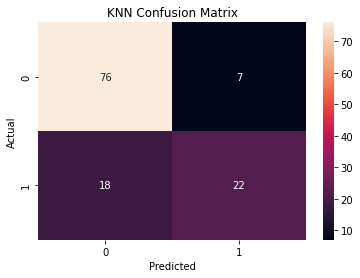

In [28]:
# Evaluating the model 
conf_mat = confusion_matrix(y_test, y_pred) #confusion matrix 
conf_mat = sns.heatmap(conf_mat, annot = True)
conf_mat.set_title('KNN Confusion Matrix')
conf_mat.set_xlabel('Predicted')
conf_mat.set_ylabel('Actual')
print("Accuracy is", accuracy_score(y_test, y_pred)*100, "%")

Classification using Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [30]:
#Function to perform training with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 10, min_samples_leaf = 5)
clf_entropy.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=100)

In [31]:
#Function to make Predictions 
y_pred_tree = clf_entropy.predict(X_test_scaled)
y_pred_tree # 1.0 = yes, person has diabetes and 0.0 = no, person doesn't have diabetes

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

Accuracy is 77.23577235772358 %


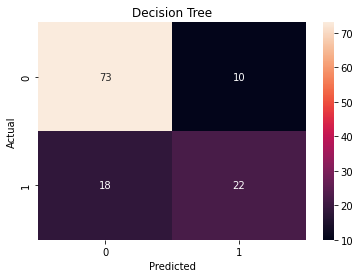

In [32]:
#Evaluate Model
conf_mat = confusion_matrix(y_test, y_pred_tree) #confusion matrix 
conf_mat = sns.heatmap(conf_mat, annot = True)
conf_mat.set_title('Decision Tree')
conf_mat.set_xlabel('Predicted')
conf_mat.set_ylabel('Actual')
#Checking Accuracy
print("Accuracy is", accuracy_score(y_test, y_pred_tree)*100,"%")

Classification using Support Vector Machine 

In [33]:
from sklearn.svm import SVC 

#Using the function
SVM_Model = SVC(gamma = 'auto')
SVM_Model.fit(X_train_scaled, y_train)


SVC(gamma='auto')

In [34]:
#Function to make Predictions 
y_pred_svm = SVM_Model.predict(X_test_scaled)
y_pred_svm

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

Accuracy is 75.60975609756098 %


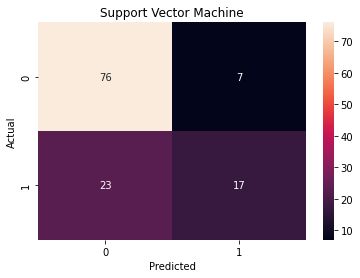

In [35]:
#Evaluate Model
conf_mat = confusion_matrix(y_test, y_pred_svm) #confusion matrix 
conf_mat = sns.heatmap(conf_mat, annot = True)
conf_mat.set_title('Support Vector Machine')
conf_mat.set_xlabel('Predicted')
conf_mat.set_ylabel('Actual')
#Checking Accuracy
print("Accuracy is", accuracy_score(y_test, y_pred_svm)*100,"%")